# Import Libraries 

In [6]:
## import libraries 
import pandas as pd
import os 
import numpy as np
from PIL import Image
from sklearn import preprocessing
from pathlib import Path
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std


In [7]:
## import ML methods 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [8]:
## importing learning rate graph libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt

In [9]:
##import conusion matrix (plot)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Load training Data

In [10]:
# load x train data
def import_x():
    def get_images(path):
        #create array to hold all images information 
        all_images_as_array = []
        for filename in os.listdir(path):
            # open file
            img = Image.open(path+filename)
            #resize 
            new_img = img.resize((64, 64))
            #convert to array
            np_array = np.asarray(new_img)
            #apprend to one array
            all_images_as_array.append(np_array)
        # return array with all images 
        return np.array(all_images_as_array)
    #path to image folder
    x_train = get_images('Datasets\\celeba\\img\\')
    #reshappe and re-process image 
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    #create scaler to scale the scale in imput
    scaler = preprocessing.StandardScaler().fit(x_train)
    #scale the input to normalise the features 
    x_train_not_split = scaler.transform(x_train)
    #retrun normalised array of all images 
    return x_train_not_split 
    


In [11]:
# import y label train
def import_y():
    # open csv file with labele s
    dataFrame = pd.read_csv('Datasets\\celeba\\labels.csv',header = None, prefix="data")
    #create pandas tabel 
    dataFrame['data1']= dataFrame['data0'].str.split('\t')
    #seperate into columns 
    df3 = pd.DataFrame(dataFrame['data1'].to_list(), columns=['image_number','jpg','gender','smiling'])
    # separate out geneder information and replace -1 with 0 
    df3['gender'] = df3['gender'].replace(['-1'], '0')
    # reorder to same os image inputs 
    df3 = df3.sort_values(by ='image_number')
    #remove column heading 
    df3 = df3.drop(0)
    # change to int64 for selected gender column
    df3['gender'] = pd.to_numeric(df3['gender'])
    y_train_not_split = df3['gender']
    #return array with all labels 
    return y_train_not_split


# Split training data 

In [12]:
#split data 
def split_data(x,y):
    #split training input into 80% training 20% validation
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
    #output the training and validation set 
    return x_train,x_test,y_train,y_test 

# import test data 

In [10]:
# load x test data 
def import_x_test():
    #create array for image output
    all_images_as_array = []
    #iterate through all images in the test folder
    for filename in os.listdir('Datasets\\celeba_test\\img\\'):
        #open image in file
        img = Image.open('Datasets\\celeba_test\\img\\'+filename)
        #resize image to 64x64
        new_img = img.resize((64, 64))
        #convert image to array
        np_array = np.asarray(new_img)
        #append array to all image array
        all_images_as_array.append(np_array)
    x_test_test_data = np.array(all_images_as_array)
    # reshape array
    x_test_test_data = np.reshape(x_test_test_data, (x_test_test_data.shape[0], -1))
    # create scale to normalise the imput
    scaler = preprocessing.StandardScaler().fit(x_test_test_data)
    #nomalise th earray 
    x_test_test_data = scaler.transform(x_test_test_data)
    #output test s imput
    return x_test_test_data


In [11]:
 # import y label test
def import_y_test():   
    # open csv file with the labeles 
    test_dataFrame = pd.read_csv('Datasets\\celeba_test\\labels.csv',header = None, prefix="data")
    # split the tabel into columns for each label type 
    test_dataFrame['data1']= test_dataFrame['data0'].str.split('\t')
    #name the column 
    test_df3 = pd.DataFrame(test_dataFrame['data1'].to_list(), columns=['image_number','jpg','gender','smiling'])
    # replace -1 with 0
    test_df3['gender'] = test_df3['gender'].replace(['-1'], '0')
    # sort the label into alphabetical order by image number 
    test_df3 = test_df3.sort_values(by ='image_number')
    #remove the 0th row
    test_df3 = test_df3.drop(0)
    #conver to numeric and select gender column
    test_df3['gender'] = pd.to_numeric(test_df3['gender'])
    y_test_test_data = test_df3['gender']
    # output y test imput
    return y_test_test_data

# Making final model 

In [12]:
# produce the optimised final model 
def final_model(x_train, y_train):
    #load classifier 
    # make mode with optimised hyperparameters 
    models = LogisticRegression(C= 0.01)
    print('The optimised model used for A1 is:',models)
    # Fit the classifier
    models.fit(x_train, y_train)
    #output final model 
    return models

# Make prediction on the test data set and confusion matrix 

In [13]:
#evaluate model with the test data set and produce confusion matrx of results 
def asses_model(models,x_test_test_data,y_test_test_data):
    # Make predictions
    predictions = models.predict(x_test_test_data)

    # Calculate metrics
    accuracy= accuracy_score(predictions, y_test_test_data)
    #print the model accuracy as a percentage 
    print('The model accuracy for A1 is:',accuracy*100,'%')

    # plot confusion matrix 
    plot_confusion_matrix(models, x_test_test_data, y_test_test_data, cmap=plt.cm.Blues)  
    #show confusion plot 
    plt.show()

# final model function 

In [14]:
# function to run the fina model 
def A1():
    #import X vales 
    x_train_not_split = import_x()
    #import y values 
    y_train_not_split = import_y()
    # split training into training and validation data 
    x_train,x_test,y_train,y_test  = split_data(x_train_not_split,y_train_not_split)
    #import y test 
    y_test_test = import_y_test()
    #import x test
    x_test_test = import_x_test()
    #import fina lmodel for evlaustion 
    models = final_model(x_train,y_train)
    #evaluate final model 
    asses_model(models,x_test_test,y_test_test)                                        
    
    

C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The model accuracy for A1 is: 91.3 %


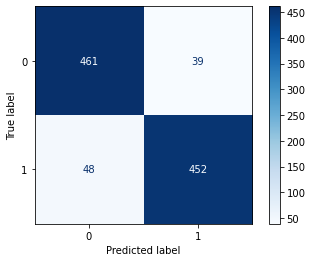

In [15]:
A1()

In [13]:
# function to import y and x and divide into train and validation set 
def import_X_Y():
    # import x
    x_train_not_split = import_x()
    #imprt y 
    y_train_not_split = import_y()
    #split data into training anad validation 
    x_train,x_test,y_train,y_test  = split_data(x_train_not_split,y_train_not_split)
    #output training and validation 
    return x_train,x_test,y_train,y_test,x_train_not_split, y_train_not_split

In [14]:
# run function to inport x/y and create training and validation dataset 
x_train,x_test,y_train,y_test,x_train_not_split, y_train_not_split = import_X_Y()

# Cross validation to select the best model 

In [15]:
## create dicotary to hold CV results 
CV_df = pd.DataFrame({"METHOD":[],"MEAN":[],"STD":[]})
#cross validation - split data into 10 graoups and repate 3 times 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)               

In [16]:
#Logistic regression 
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#create dicoary of results 
CV_df_LR = {'Method':'Logistic regression','MEAN':scores.mean(),'STD':scores.std()}

In [ ]:

#Decision  tree 
#create model 
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#create dicotary of results 
CV_df_DT = {'Method':'Decision Tree','MEAN':scores.mean(),'STD':scores.std()}

In [ ]:
#Random Forest  
#creat model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#create dicotary of results 
CV_df_RF = {'Method':'Random Forest','MEAN':scores.mean(),'STD':scores.std()}

In [ ]:
#K nearest Neighbours  
#creat model
model = KNeighborsClassifier()
#evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#creaet dictoary of results 
CV_df_KN = {'Method':'K-Nearest Neighbors','MEAN':scores.mean(),'STD':scores.std()}

In [ ]:
#compile dictoaries into one pandnas tabel
list_of_dict = CV_df_LR, CV_df_DT,CV_df_RF,CV_df_KN
# add list to pandas data frame 
df = pd.DataFrame(list_of_dict)
#print table of results 
df

# Logistic regression model hyperparameter tuning

In [ ]:
# make model of ligistic regession (highest accuracy of the CV) 
models= LogisticRegression()
    
#Fit the classifier
models.fit(x_train, y_train)
    

In [ ]:
#Create the parameter grid based on the results of random search 
param_grid = { 'C':[100,10,1.0,0.1,0.01]}

#Create a based model
lr =LogisticRegression()
# iterate through all the C values 3 times 
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid,  cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
## Fit the grid search to the data
grid_search.fit(x_train, y_train)
#find best parameters 
grid_search.best_params_
best_grid = grid_search.best_estimator_
#print best parameter 
best_grid

# Making hyperparameter boxplot 

In [ ]:
# result of CV into tabel 
# compile results into pandas table 
results_df = pd.DataFrame(grid_search.cv_results_)
# sort by best test score 
results_df = results_df.sort_values(by=["rank_test_score"])
# compine results to find averages 
results_df = results_df.set_index(results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis("kernel")
# add columns for the mean/ standard deviation to table 
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]


In [ ]:
## extract paramets and test scores 
r_df = results_df[['param_C','split0_test_score','split1_test_score' , 'split2_test_score']]

In [ ]:
## plot test scores 
#rotate table 
df = r_df.set_index('param_C')
#plot box plot 
df.T.boxplot()

# Making learning rate plot 

In [ ]:
##create data for all the iteration needed for the learning rate graph 
# create pipeline for optomised model 
pipeline = make_pipeline(LogisticRegression(C= 0.01))
#create parameters to measure and vary #
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train_not_split, y=y_train_not_split,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)

In [ ]:
# calculates points for plot 
#calcuate training plots 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
#calculates validation set plot points 
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
#create learning plot 
#create plot for the training data against training size 
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
#fill with blue to show standard deviation 
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
#creat eplot for valiation data 
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
#fill standard divation in green 
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
#title and axis label the groah 
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
#create legend for colours 
plt.legend(loc='lower right')
#show graph 
plt.show()